<a href="https://colab.research.google.com/github/alan-morais/1/blob/main/Mega_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re
import seaborn as sns
from collections import Counter
from prettytable import PrettyTable
import numpy as n

#Gerar dataframe

In [ ]:
#projeto do github https://github.com/guto-alves/loterias-api

url = "https://loteriascaixa-api.herokuapp.com/api/megasena/"

response = requests.get(url)
data = response.json()

concursos_data = []

for concurso in data:
    concursos_data.append(concurso)

df = pd.DataFrame(concursos_data)

df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y', errors='coerce')

df['dezenas'] = df['dezenas'].apply(lambda x: [int(d) for d in x])

pd.set_option('display.max_columns', None)
print(df.head(1))

    loteria  concurso       data                             local  \
0  megasena      2809 2024-12-17  ESPAÇO DA SORTE em SÃO PAULO, SP   

        dezenasOrdemSorteio                 dezenas trevos timeCoracao  \
0  [04, 39, 02, 34, 28, 15]  [2, 4, 15, 28, 34, 39]     []        None   

  mesSorte                                         premiacoes  \
0     None  [{'descricao': '6 acertos', 'faixa': 1, 'ganha...   

  estadosPremiados observacao  acumulou  proximoConcurso dataProximoConcurso  \
0               []                 True             2810          31/12/2024   

  localGanhadores  valorArrecadado  valorAcumuladoConcurso_0_5  \
0              []       40530585.0                1.622087e+08   

   valorAcumuladoConcursoEspecial  valorAcumuladoProximoConcurso  \
0                    1.622087e+08                   1.622087e+08   

   valorEstimadoProximoConcurso  
0                   600000000.0  


In [ ]:
def extrair_local(local):
    pattern = r"em (.*?), (.*)"
    match = re.search(pattern, local)
    if match:
        municipio, uf = match.groups()
        return municipio, uf
    else:
        return None, None

df[['municipioSorteio', 'ufSorteio']] = df['local'].apply(extrair_local).apply(pd.Series)


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   loteria                         2809 non-null   object        
 1   concurso                        2809 non-null   int64         
 2   data                            2809 non-null   datetime64[ns]
 3   local                           2809 non-null   object        
 4   dezenasOrdemSorteio             2809 non-null   object        
 5   dezenas                         2809 non-null   object        
 6   trevos                          2809 non-null   object        
 7   timeCoracao                     0 non-null      object        
 8   mesSorte                        0 non-null      object        
 9   premiacoes                      2809 non-null   object        
 10  estadosPremiados                2809 non-null   object        
 11  obse

,concurso,data,proximoConcurso,valorArrecadado,valorAcumuladoConcurso_0_5,valorAcumuladoConcursoEspecial,valorAcumuladoProximoConcurso,valorEstimadoProximoConcurso
count,2809.000000,2809,2809.000000,2.809000e+03,2.809000e+03,2.809000e+03,2.809000e+03,2.809000e+03
mean,1405.000000,2012-03-13 21:31:20.099679488,1406.000000,3.567196e+07,1.100807e+07,2.609212e+07,1.786670e+07,2.018782e+07
min,1.000000,1996-03-11 00:00:00,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,703.000000,2005-10-01 00:00:00,704.000000,0.000000e+00,3.713540e+06,0.000000e+00,1.079956e+06,0.000000e+00
50%,1405.000000,2012-07-11 00:00:00,1406.000000,2.799806e+07,6.740492e+06,1.398975e+07,9.504559e+06,6.000000e+06
75%,2107.000000,2018-12-15 00:00:00,2108.000000,4.607218e+07,1.178773e+07,4.585885e+07,2.515886e+07,2.850000e+07
max,2809.000000,2024-12-17 00:00:00,2810.000000,2.426253e+09,2.670063e+08,1.735093e+08,2.670063e+08,6.000000e+08
std,811.032778,NaN,811.032778,8.889326e+07,1.694975e+07,3.060059e+07,2.562835e+07,3.735506e+07


In [ ]:
tabela = PrettyTable(['Dezena', 'Frequência'])
todas_dezenas = [dezena for dezenas in df['dezenas'] for dezena in dezenas]
frequencia_dezenas = Counter(todas_dezenas)
for dezena, frequencia in frequencia_dezenas.most_common(12):
    tabela.add_row([dezena, frequencia])
print(tabela)


+--------+------------+
| Dezena | Frequência |
+--------+------------+
|   10   |    329     |
|   53   |    319     |
|   33   |    306     |
|   34   |    305     |
|   5    |    303     |
|   37   |    302     |
|   42   |    299     |
|   35   |    298     |
|   32   |    298     |
|   23   |    298     |
|   44   |    298     |
|   38   |    297     |
+--------+------------+


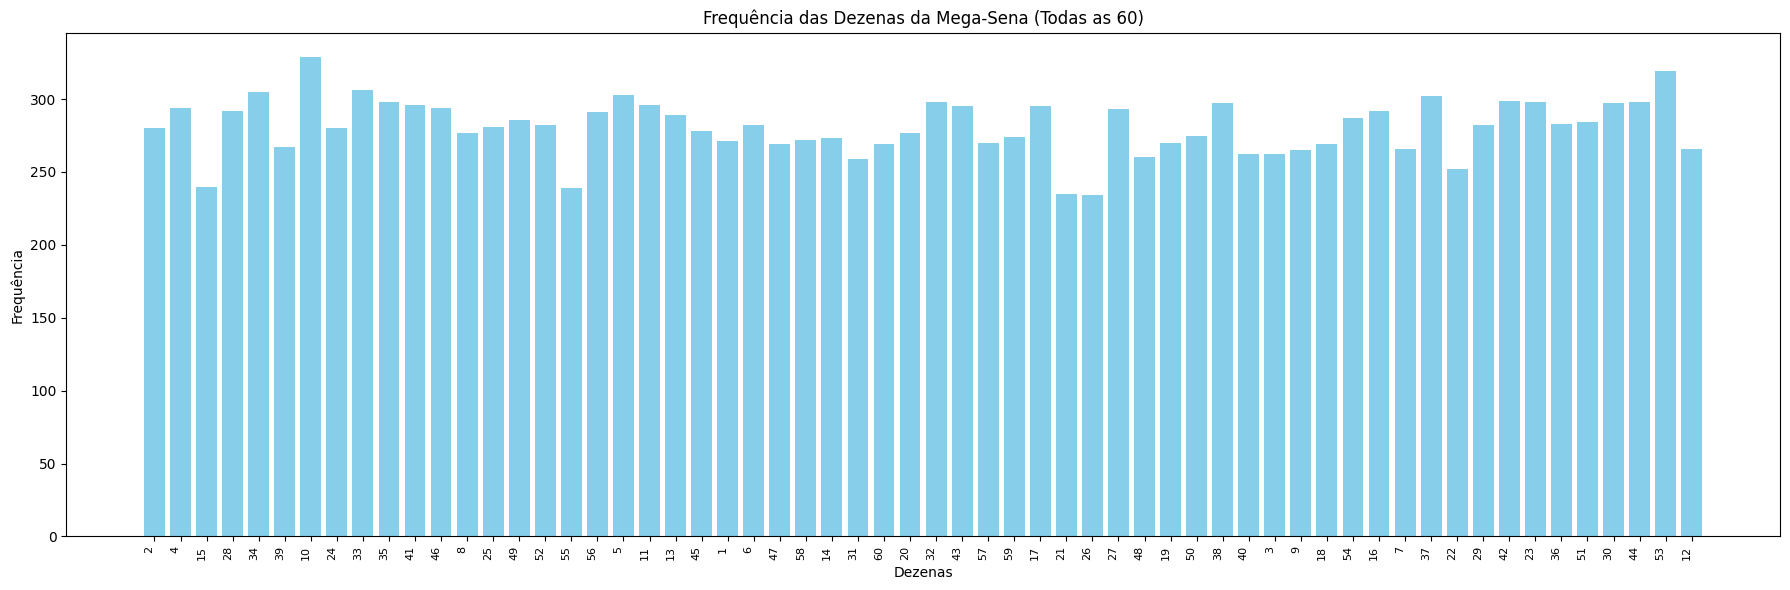

In [ ]:
dezenas = [str(dezena) for dezena, frequencia in frequencia_dezenas.items()]
frequencias = [frequencia for dezena, frequencia in frequencia_dezenas.items()]

plt.figure(figsize=(18, 6))
plt.bar(dezenas, frequencias, color='skyblue')
plt.title('Frequência das Dezenas da Mega-Sena (Todas as 60)')
plt.xlabel('Dezenas')
plt.ylabel('Frequência')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

# Gráficos

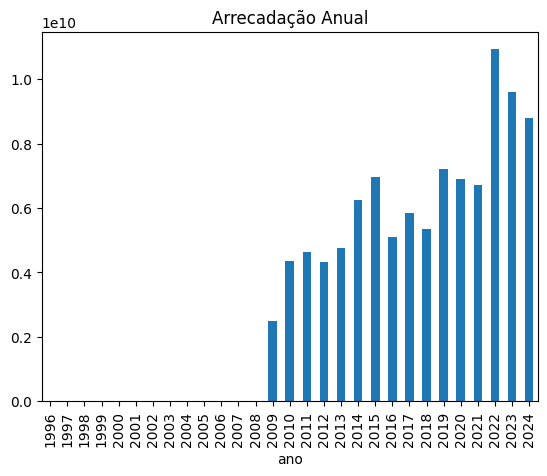

In [ ]:
import matplotlib.pyplot as plt
df['ano'] = df['data'].dt.year
df.groupby('ano')['valorArrecadado'].sum().plot(kind='bar')
plt.title('Arrecadação Anual')
plt.show()


## Escrever o Readme.md

In [ ]:
with open('/content/README.md','w') as f:
    f.write('README\n')
    f.write('---\n')
    f.write('# Estrutura dos Dados da Mega-Sena\n')
    f.write('## Descrição Geral\n')
    f.write('Este conjunto de dados contém informações detalhadas sobre os resultados dos concursos da Mega-Sena, incluindo dados sobre os números sorteados, premiações, e outras informações relevantes.\n')
    f.write('## Conteúdo\n')
    f.write('Usei o projeto do github https://github.com/guto-alves/loterias-api para gerar o dataframe.\n')
    f.write('Cada registro representa um concurso específico e contém os seguintes campos:\n')
    f.write('* **loteria:** Indica o tipo de loteria (neste caso, sempre "megasena").\n')
    f.write('* **concurso:** Número do concurso.\n')
    f.write('* **data:** Data do sorteio.\n')
    f.write('* **local:** Local onde o sorteio foi realizado.\n')
    f.write('* **dezenasOrdemSorteio:** Lista das dezenas na ordem em que foram sorteadas.\n')
    f.write('* **dezenas:** Lista das dezenas ordenadas numericamente.\n')
    f.write('* **trevos, timeCoracao, mesSorte:** Campos geralmente vazios para a Mega-Sena, utilizados em outras modalidades de loteria.\n')
    f.write('* **premiacoes:** Um objeto contendo informações detalhadas sobre as premiações, como faixas, número de ganhadores e valores.\n')
    f.write('* **estadosPremiados:** Lista dos estados onde houve ganhadores.\n')
    f.write('* **observacao:** Informações adicionais sobre o concurso.\n')
    f.write('* **acumulou:** Indica se houve acúmulo de prêmio (True/False).\n')
    f.write('* **proximoConcurso:** Número do próximo concurso.\n')
    f.write('* **dataProximoConcurso:** Data estimada para o próximo concurso.\n')
    f.write('* **localGanhadores:** Detalhes sobre os ganhadores, incluindo quantidade e localização.\n')
    f.write('* **valorArrecadado:** Valor total arrecadado no concurso.\n')
    f.write('* **valorAcumuladoConcurso_0_5:** Valor acumulado em faixas específicas.\n')
    f.write('* **valorAcumuladoConcursoEspecial:** Valor acumulado para concursos especiais.\n')
    f.write('* **valorAcumuladoProximoConcurso:** Valor acumulado para o próximo concurso.\n')
    f.write('* **valorEstimadoProximoConcurso:** Valor estimado para o prêmio do próximo concurso.\n')
    f.write('* **municipioSorteio:** Município onde o sorteio ocorreu.\n')
    f.write('* **ufSorteio:** Estado onde o sorteio ocorreu.\n')
    f.write('* **ano:** Ano do concurso.\n')
    f.write('## Limpeza de Dados\n')
    f.write('Para garantir a qualidade dos dados, foram realizadas as seguintes etapas de limpeza:\n')

